In [1]:
# Look at frequency content of single source single receiver data through the May Stimulation
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
import os
from obspy.io.seg2.seg2 import _read_seg2
import numpy as np
import pandas as pd
from phasepickers.parker_cfs import CASSM_chanDecode, src_rec_dist
from datetime import datetime as datetime
from scipy.spatial.distance import cdist
import pickle

In [2]:
geomcols=np.arange(8)
wellcols=np.arange(12)
CASSMGeom=pd.read_excel('/home/spri902/Collab_metadata/SigmaV_Channel_Monitoring_Rev_1.0_PetrovMod.xlsx',\
                        sheet_name='Geode',header=0,usecols=geomcols)
CASSMsrc=pd.read_excel('/home/spri902/Collab_metadata/SigmaV_Channel_Monitoring_Rev_1.0_PetrovMod.xlsx',\
                        sheet_name='CASSM_Channels',header=0,usecols=geomcols)
CASSMsrc.columns = [c.replace(' ','_') for c in CASSMsrc.columns]
WellGeom=pd.read_excel('/home/spri902/Collab_metadata/Well_Points.xlsx',header=0,usecols=wellcols)

/home/spri902/anaconda3/envs/obspy/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/spri902/anaconda3/envs/obspy/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
# get file info and dates from directories
directory = sorted(os.walk('/home/spri902/mayCASSM'))
dates = [datetime.strptime(d,'%Y%m%d%H%M%S') for d in sorted(directory[0][1])]
xlims = mdates.date2num(dates)

# PST src and channels for PDB hydrophones and accels
src=[9] # PST source
hydChan=slice(0,12) # PDB hydrophones
accChan=slice(30,36)# PDB accels
ac2Chan=slice(39,42)# PDB accels
# PDB hydrophone and accels listed by channel number ** not index **
recVec = np.array((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                    31, 32, 33, 34, 35, 36, 40, 41, 42))
# pull src and rec locations
srcloc = CASSMsrc.loc[src[0],'Easting_m':'Elev_m'].values
srcloc = srcloc.reshape(-1,3).astype(float)
recloc = CASSMGeom.loc[recVec-1,'Easting(m)':'Elev(m)'].values
recInd = np.arange(len(recVec))
# only need to grab part of the signal (don't need all 9600 samples)
siglen = 2000
samples = np.arange(siglen)

OThydata = np.empty((len(dates),siglen,len(recVec)))
cnt=0
low=3000
high=8000
os.chdir('/home/spri902/EGS_Collab/4850/results/maystim/processed_CASSM/single_src_rec_gathers/src9_PDBhyds_accs')
OThydata = np.load('PST9data.npy')

In [5]:
# load plots of single src - rec gathers
for i in recInd:    
    fig1,ax = plt.subplots()
    recID = CASSMGeom[CASSMGeom["Channel"] == recVec[i]].Sensor.item()
    dist = np.round(src_rec_dist(srcloc,recloc),2)
    vm = np.percentile(OThydata[:,:,i],99)
    #img = ax.imshow(OThydata[:,:,i].T,extent=[xlims[0],xlims[-1],1999,0],aspect='auto',cmap='RdBu',vmin=-vm,vmax=vm)
    img = ax.pcolormesh(xlims,samples,OThydata[:,:,i].T,cmap='RdBu')
    plt.gca().invert_yaxis()
    ax.xaxis_date()
    plt.colorbar(img)
    plt.gcf().autofmt_xdate()
    plt.title(f'CASSM Source: {src[0]} Receiver: {recID} S_R_dist: {dist[0][i]}')
    plt.axvline(dates[42],color='green')
    plt.axvline(dates[50],color='red')
    plt.axvline(dates[96],color='green')
    plt.axvline(dates[106],color='red')
    plt.axvline(dates[224],color='green')
    plt.axvline(dates[232],color='red')
    plt.axvline(dates[352],color='green')
    plt.axvline(dates[368],color='red')
    plt.axvline(dates[472],color='green')
    plt.axvline(dates[475],color='red')
    plt.axvline(dates[507],color='green')
    plt.axvline(dates[512],color='red')
    pickle.dump(ax, open(f'CASSM_Source_{src[0]}_Receiver_{recID}','wb'))
    plt.close()


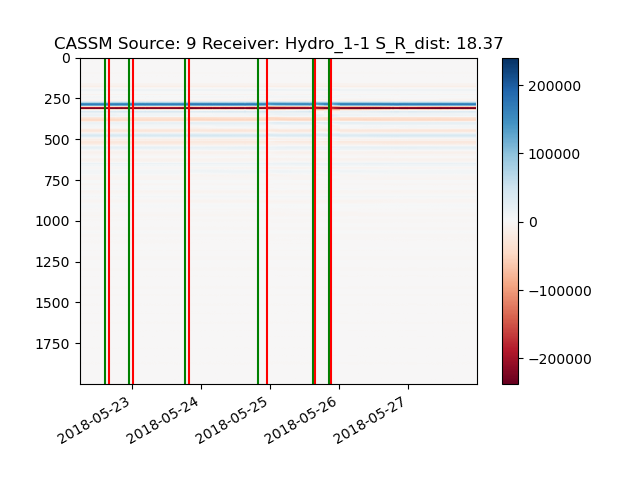

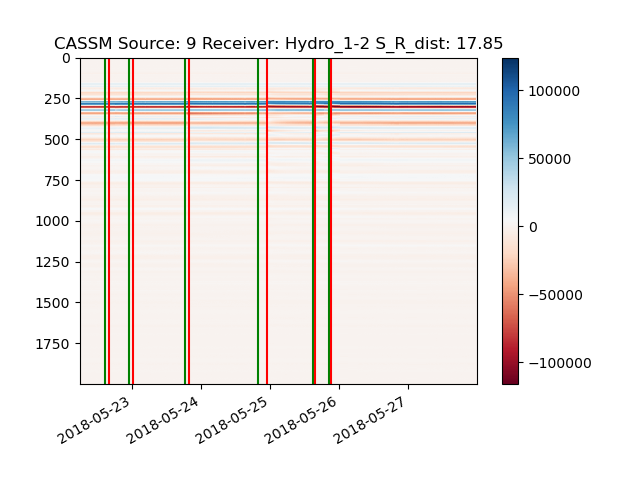

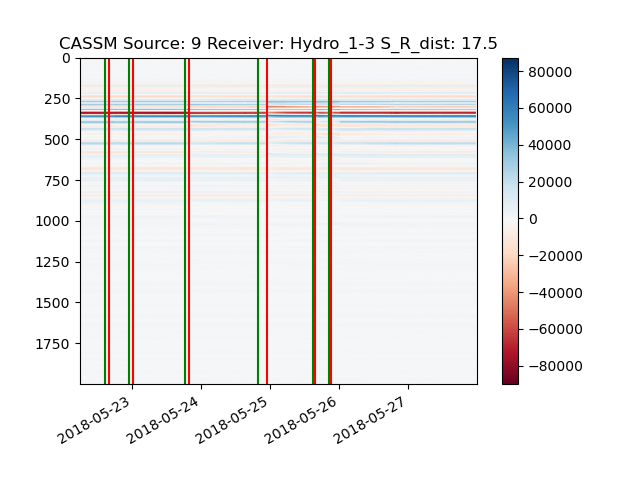

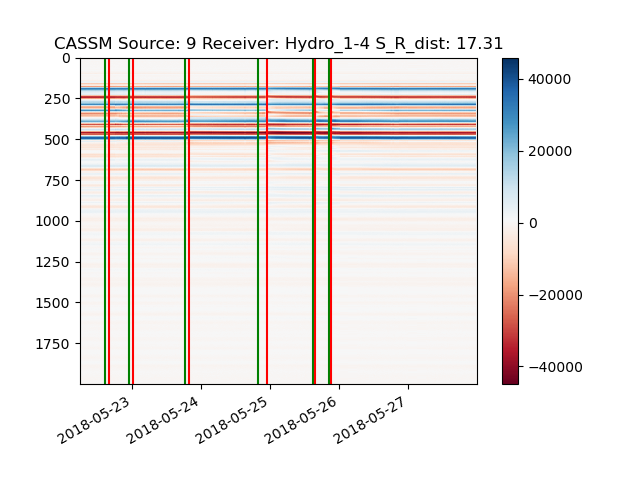

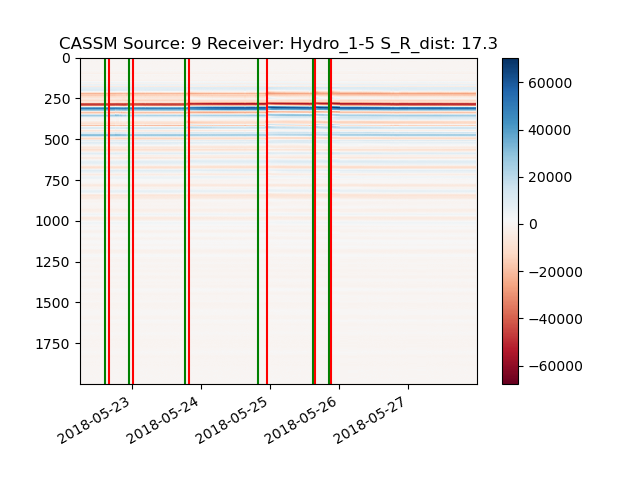

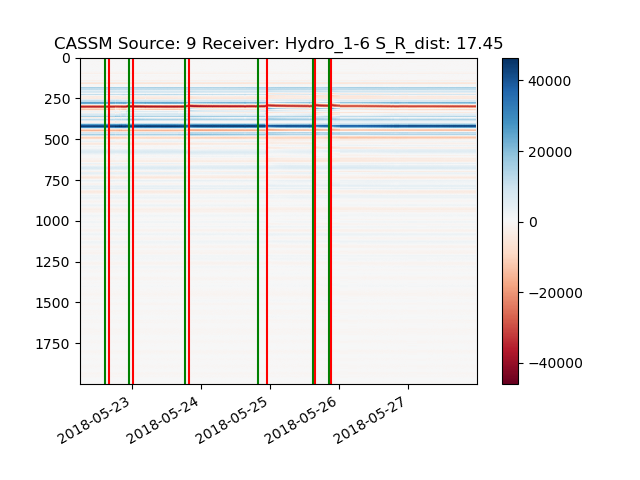

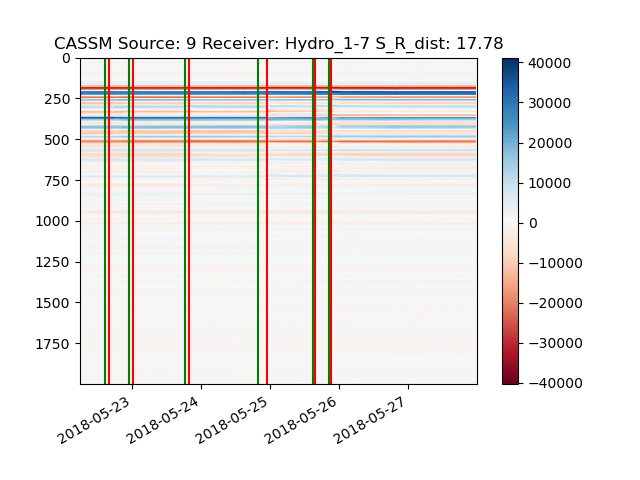

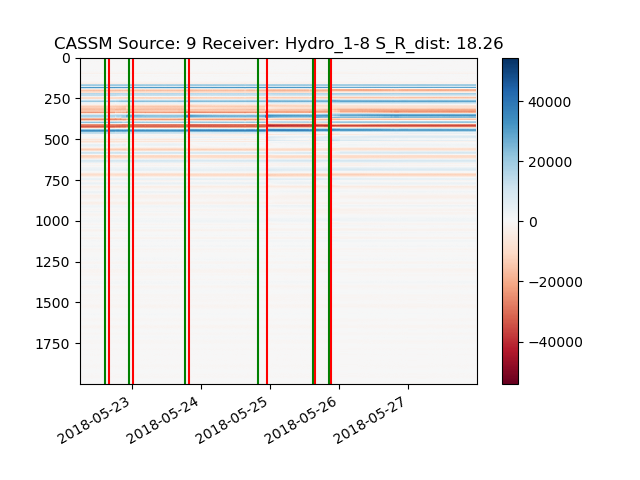

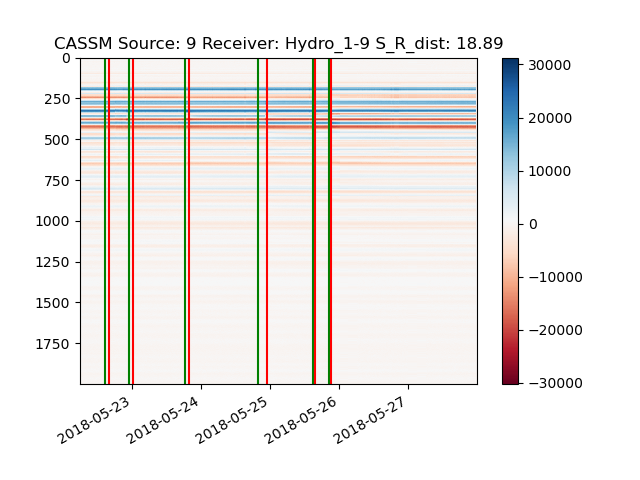

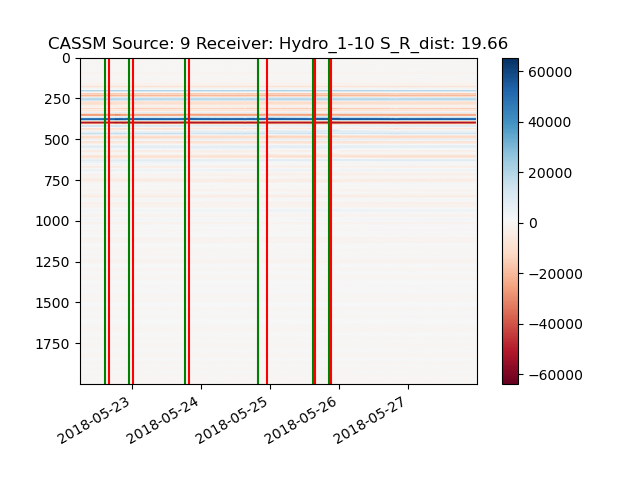

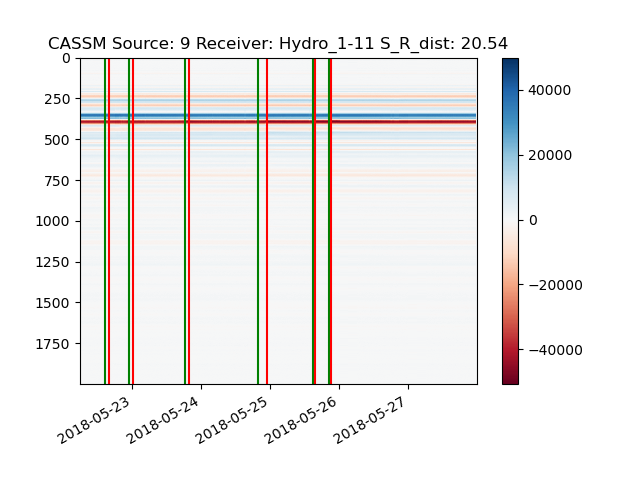

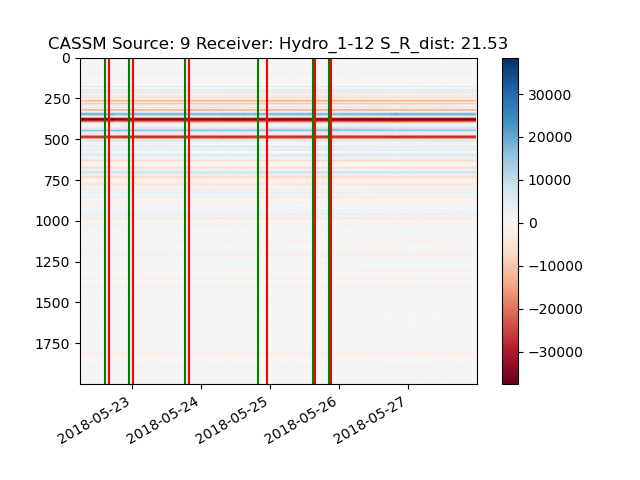

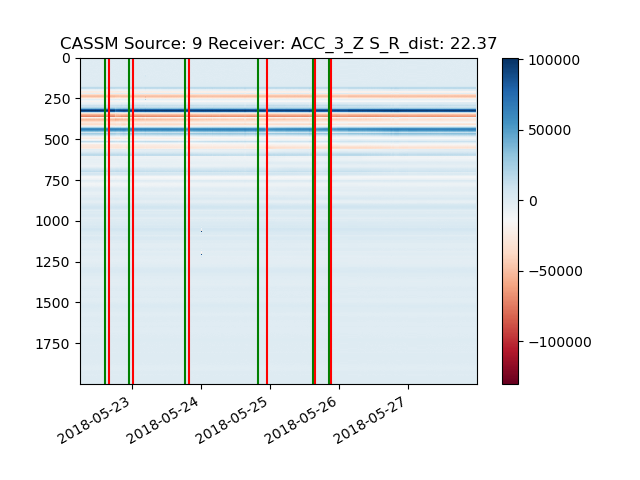

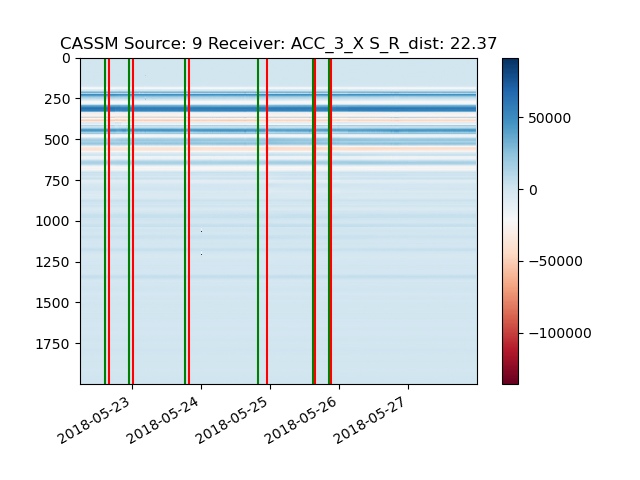

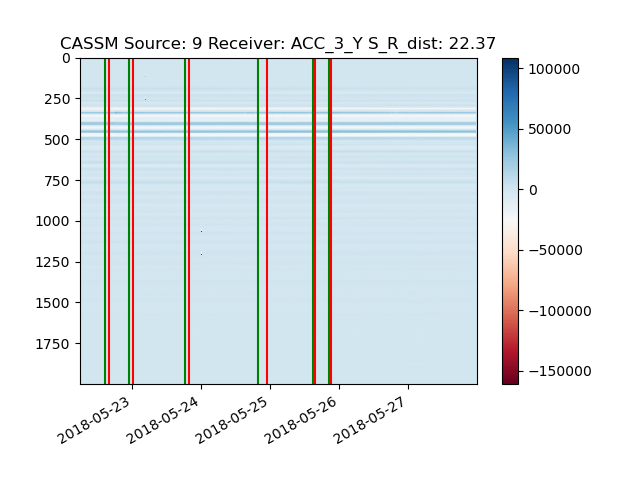

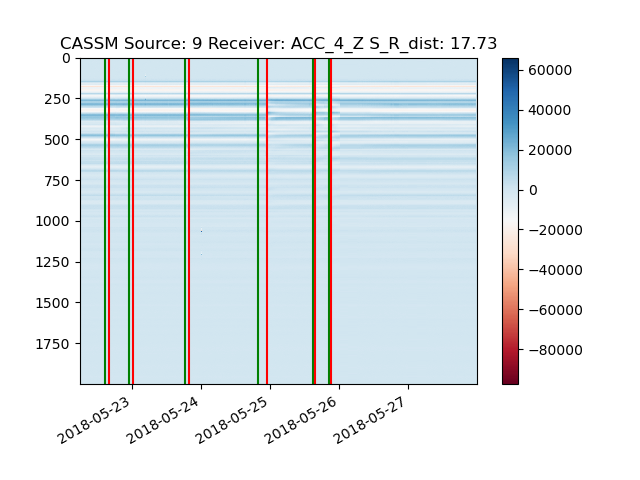

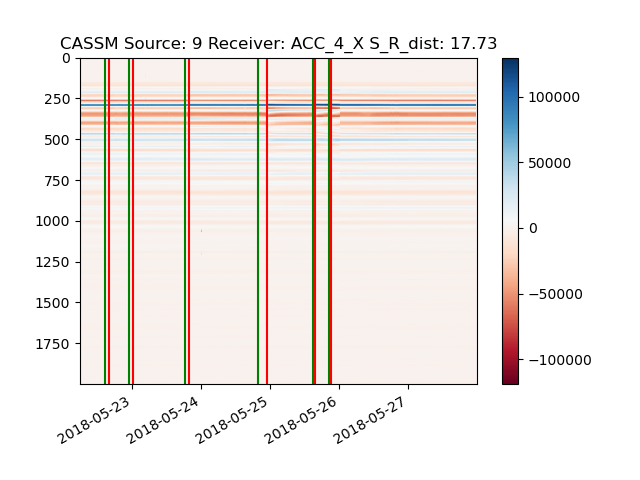

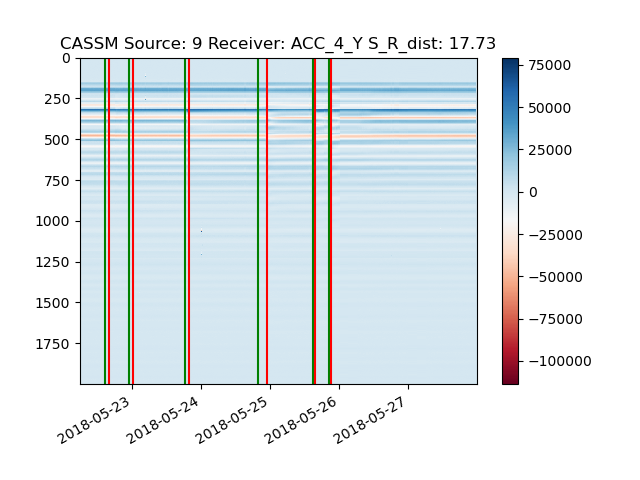

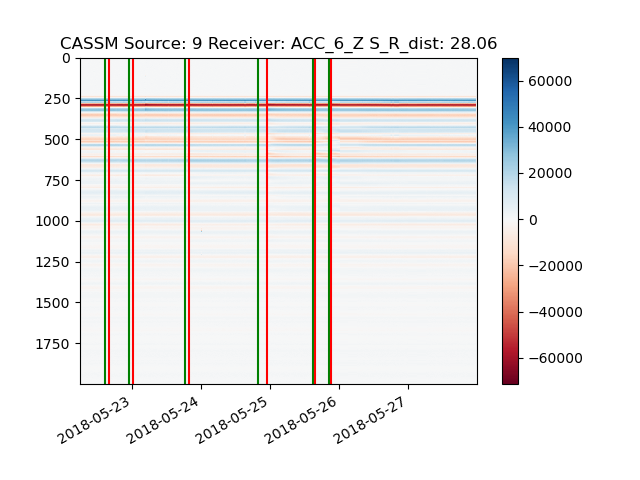

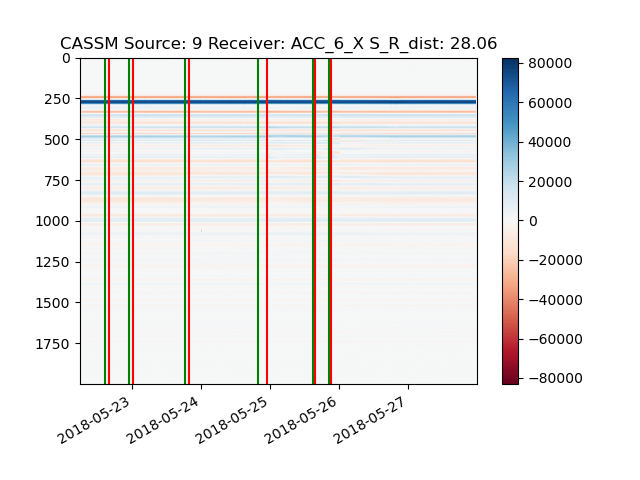

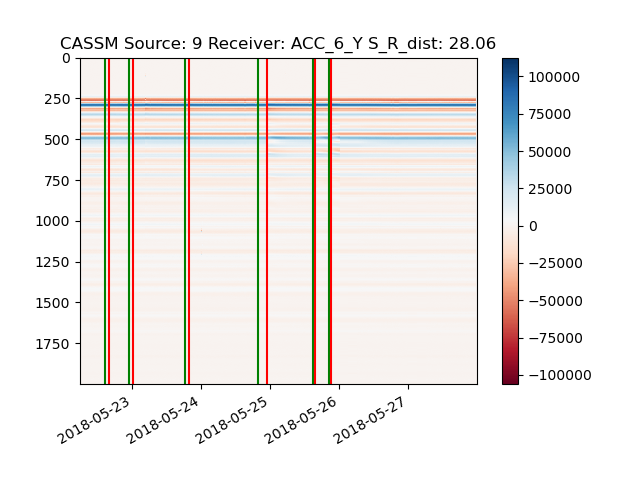

In [6]:
for i in recInd:
    recID = CASSMGeom[CASSMGeom["Channel"] == recVec[i]].Sensor.item()
    fig = pickle.load(open(f'CASSM_Source_{src[0]}_Receiver_{recID}','rb'))